# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Data preparation for Energy production

In [2]:
# read fichier de la production energie
df_production_energie = pd.read_csv('Energie_produite(par groupe).csv')

In [3]:
df_production_energie

,Date,Group1,Group2
0,2023-03-03T22:00:00+01:00,107.0,NaN
1,2023-03-03T23:00:00+01:00,136.0,NaN
2,2023-03-04T00:00:00+01:00,127.0,NaN
3,2023-03-04T01:00:00+01:00,109.0,NaN
4,2023-03-04T02:00:00+01:00,85.0,NaN
...,...,...,...
8389,2023-09-30T19:00:00+02:00,NaN,0.0
8390,2023-09-30T20:00:00+02:00,NaN,0.0
8391,2023-09-30T21:00:00+02:00,NaN,0.0
8392,2023-09-30T22:00:00+02:00,NaN,0.0


In [4]:
df_production_energie.isnull().sum()

Date         0
Group1    4249
Group2    4145
dtype: int64

In [5]:
nan_count_both_columns = df_production_energie[df_production_energie['Group1'].isna() & df_production_energie['Group2'].isna()].shape[0]
nan_count_both_columns

0

In [6]:
#on regroupe la production du groupe 1 et du groupe 2 sur les dates
result = df_production_energie.pivot_table(index='Date', values=['Group1', 'Group2'], aggfunc='sum', fill_value=0)
result= result.reset_index()
result

,Date,Group1,Group2
0,2023-03-03T20:00:00+01:00,0,22
1,2023-03-03T21:00:00+01:00,0,30
2,2023-03-03T22:00:00+01:00,107,124
3,2023-03-03T23:00:00+01:00,136,161
4,2023-03-04T00:00:00+01:00,127,128
...,...,...,...
4111,2023-09-30T19:00:00+02:00,0,0
4112,2023-09-30T20:00:00+02:00,0,0
4113,2023-09-30T21:00:00+02:00,0,0
4114,2023-09-30T22:00:00+02:00,0,0


In [7]:
##convertir la colonne Date en type date
result['Date'] = result['Date'].apply(lambda x: x.split('+')[0])
result['Date'] = pd.to_datetime(result['Date'])
result

,Date,Group1,Group2
0,2023-03-03 20:00:00,0,22
1,2023-03-03 21:00:00,0,30
2,2023-03-03 22:00:00,107,124
3,2023-03-03 23:00:00,136,161
4,2023-03-04 00:00:00,127,128
...,...,...,...
4111,2023-09-30 19:00:00,0,0
4112,2023-09-30 20:00:00,0,0
4113,2023-09-30 21:00:00,0,0
4114,2023-09-30 22:00:00,0,0


In [8]:
# Check for duplicate records
result.duplicated().value_counts()
# There is no duplicate record in this dataset

False    4116
dtype: int64

In [9]:
#voir le nombre de missing data/ 0 kwh production
a= (result['Group1'] == 0).sum()
b= (result['Group2'] == 0).sum()
print(a, b)

589 405


In [10]:
#save the csv after preparation
gfg_csv_data = result.to_csv('productionGlobalData.csv', index = True)

In [11]:
result['prod_total'] = result['Group1'] + result['Group2']

In [12]:
result

,Date,Group1,Group2,prod_total
0,2023-03-03 20:00:00,0,22,22
1,2023-03-03 21:00:00,0,30,30
2,2023-03-03 22:00:00,107,124,231
3,2023-03-03 23:00:00,136,161,297
4,2023-03-04 00:00:00,127,128,255
...,...,...,...,...
4111,2023-09-30 19:00:00,0,0,0
4112,2023-09-30 20:00:00,0,0,0
4113,2023-09-30 21:00:00,0,0,0
4114,2023-09-30 22:00:00,0,0,0


In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(result['Date'], result['prod_total'], alpha = 0.5)
plt.xlabel('Date et heure')
plt.ylabel('La production éolienne (MW)')
plt.title('La production éolienne totale')
plt.grid(True)
plt.show()

# Meteo Data preparation

In [13]:
df_meteo1 = pd.read_csv('meteoData1.csv')
df_meteo2 = pd.read_csv('meteoData2.csv')
df_meteo3 = pd.read_csv('meteoData3.csv')
df_meteo4 = pd.read_csv('meteoData4.csv')
df_meteo5 = pd.read_csv('meteoData5.csv')
df_meteo6 = pd.read_csv('meteoData6.csv')

In [14]:
df_meteo1.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,"Parc éolien en mer de saint-nazaire, Saint-Naz...",2023-03-03T00:00:00,3.9,0.8,1.9,86.80,0.0,0,NaN,0,...,1023.0,32.0,8.0,0,0.0,0,NaN,Partially cloudy,partly-cloudy-night,"LFRZ,LFRS"
1,"Parc éolien en mer de saint-nazaire, Saint-Naz...",2023-03-03T01:00:00,2.9,2.9,1.9,93.10,0.0,0,NaN,0,...,1023.0,0.7,7.0,0,0.0,0,NaN,Clear,clear-night,"LFRZ,LFRS"
2,"Parc éolien en mer de saint-nazaire, Saint-Naz...",2023-03-03T02:00:00,2.9,-0.1,1.9,93.14,0.0,0,NaN,0,...,1023.0,0.0,6.0,0,0.0,0,NaN,Clear,clear-night,"LFRZ,LFRS"
3,"Parc éolien en mer de saint-nazaire, Saint-Naz...",2023-03-03T03:00:00,1.9,-1.2,0.9,93.08,0.0,0,NaN,0,...,1023.0,5.0,6.0,0,0.0,0,NaN,Clear,clear-night,"LFRZ,LFRS"
4,"Parc éolien en mer de saint-nazaire, Saint-Naz...",2023-03-03T04:00:00,1.9,1.9,1.9,99.95,0.0,0,NaN,0,...,1023.0,17.3,7.0,0,0.0,0,NaN,Clear,clear-night,"LFRZ,LFRS"


In [15]:
df_meteo = pd.concat([df_meteo1, df_meteo2, df_meteo3, df_meteo4, df_meteo5, df_meteo6])
df_meteo['datetime']

0      2023-03-03T00:00:00
1      2023-03-03T01:00:00
2      2023-03-03T02:00:00
3      2023-03-03T03:00:00
4      2023-03-03T04:00:00
              ...         
163    2023-09-30T19:00:00
164    2023-09-30T20:00:00
165    2023-09-30T21:00:00
166    2023-09-30T22:00:00
167    2023-09-30T23:00:00
Name: datetime, Length: 5087, dtype: object

In [16]:
## convert the columns datetime to a date data type
df_meteo['datetime'] = pd.to_datetime(df_meteo['datetime'])
df_meteo['datetime']

0     2023-03-03 00:00:00
1     2023-03-03 01:00:00
2     2023-03-03 02:00:00
3     2023-03-03 03:00:00
4     2023-03-03 04:00:00
              ...        
163   2023-09-30 19:00:00
164   2023-09-30 20:00:00
165   2023-09-30 21:00:00
166   2023-09-30 22:00:00
167   2023-09-30 23:00:00
Name: datetime, Length: 5087, dtype: datetime64[ns]

In [17]:
#checking missing / null value
df_meteo.isnull().sum()

#la colonne preciptype et severerisk on le plus de missing data-> inutilisable, on va les supprimer

name                   0
datetime               0
temp                   0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
preciptype          4584
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          5087
conditions             0
icon                   0
stations               0
dtype: int64

In [18]:
#on enleve car trop de missing value, colonnes inutilisables
df_meteo.drop(['severerisk','preciptype'], axis = 1, inplace = True)

In [19]:
#colonne snow inutilisable, all data=0 car il ne nege pas en mer
df_meteo.drop(['snow','snowdepth'], axis = 1, inplace = True)

In [20]:
## we will also remove qualitative data
df_meteo.drop(['name','conditions', 'icon', 'stations'], axis = 1, inplace = True)

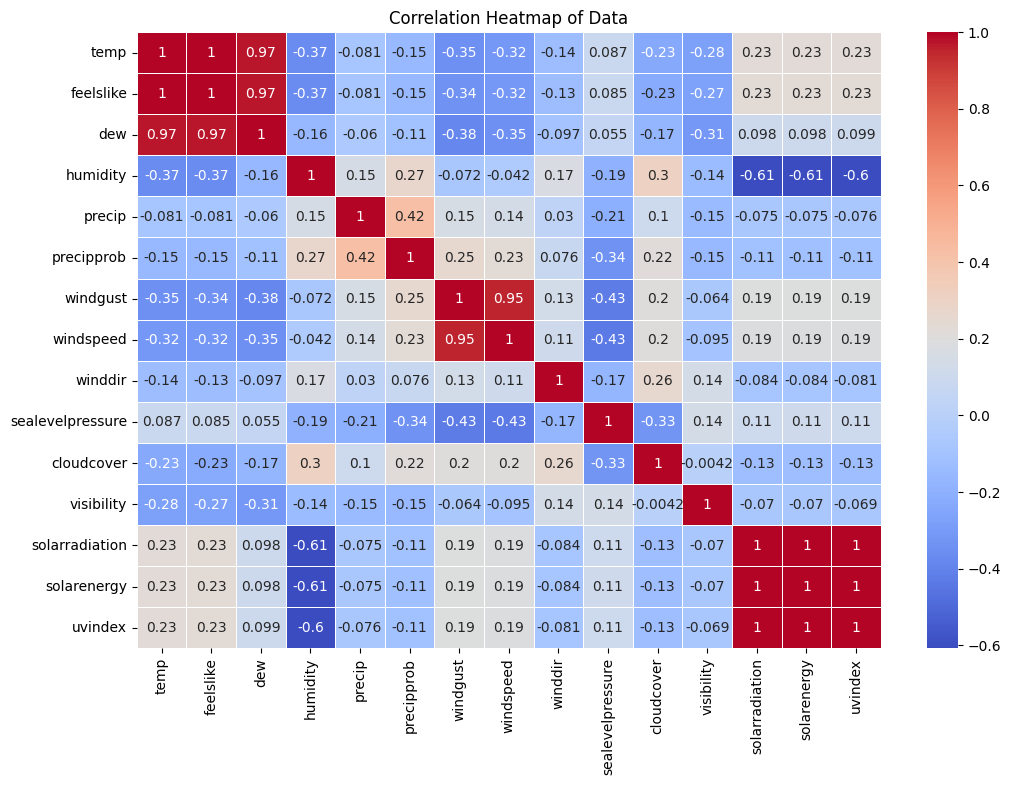

In [20]:
## verifier qu'il n'y a pas de correlation entre les colonnes et qu'on peut toutes les garder
df= df_meteo.copy()
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['datetime']).corr()

# Create a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Data')
plt.show()

In [ ]:
df_meteo

,datetime,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 00:00:00,3.9,0.8,1.9,86.80,0.0,0,25.2,12.9,10.0,1023.0,32.0,8.0,0,0.0,0
1,2023-03-03 01:00:00,2.9,2.9,1.9,93.10,0.0,0,24.1,12.6,16.0,1023.0,0.7,7.0,0,0.0,0
2,2023-03-03 02:00:00,2.9,-0.1,1.9,93.14,0.0,0,23.8,11.1,360.0,1023.0,0.0,6.0,0,0.0,0
3,2023-03-03 03:00:00,1.9,-1.2,0.9,93.08,0.0,0,23.4,11.1,360.0,1023.0,5.0,6.0,0,0.0,0
4,2023-03-03 04:00:00,1.9,1.9,1.9,99.95,0.0,0,22.0,10.8,20.2,1023.0,17.3,7.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2023-09-30 19:00:00,22.1,22.1,15.7,67.28,0.0,0,11.2,3.6,240.0,1024.1,0.0,34.7,21,0.1,0
164,2023-09-30 20:00:00,20.1,20.1,16.1,77.75,0.0,0,11.1,5.4,281.0,1024.3,30.0,29.2,0,0.0,0
165,2023-09-30 21:00:00,18.0,18.0,16.8,92.50,0.0,0,9.4,3.6,350.0,1024.3,0.0,23.8,0,0.0,0
166,2023-09-30 22:00:00,16.0,16.0,16.0,99.88,0.0,0,5.5,5.4,80.0,1024.1,0.0,23.8,0,0.0,0


In [ ]:
## on a une correlation entre =1 entre les donnees solarradiation, solarenergy et uvindex -> il faut garder qu'une colonne entre ces 3
# pareil correlation entre windgust et windspeed-> il faut garder que windspeed (utile)

## correlation entre temperature et feelslike=1 -> garder que la temp
## correlation forte =0.97 entre temp et drew

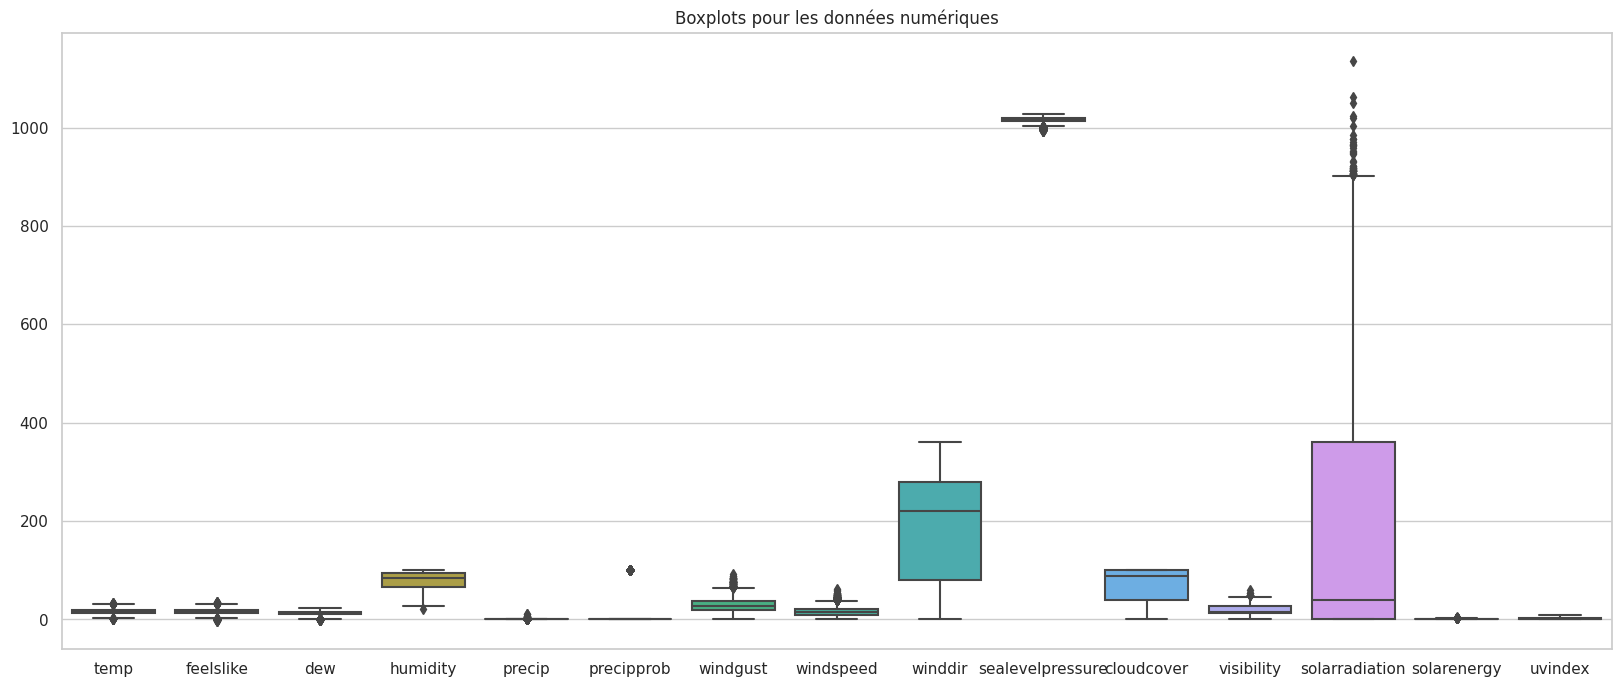

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que votre DataFrame nettoyé s'appelle df_cleaned

# Sélectionner les colonnes numériques
numerical_columns = df_meteo.select_dtypes(include='number')

# Créer des boxplots pour chaque colonne numérique
sns.set(style="whitegrid")  # Facultatif : pour un style de fond
plt.figure(figsize=(20, 8))  # Facultatif : ajuster la taille de la figure

sns.boxplot(data=numerical_columns)
plt.title('Boxplots pour les données numériques')
plt.show()


# Creation de donnees training et donnees test

In [21]:
## rename Date column pour pouvoir merge les datas
df_meteo= df_meteo.rename(columns={'datetime': 'Date'})

In [22]:
#df_meteo = df_meteo.rename(columns={'datetime': 'Date'})
new_df_meteo = pd.merge(result, df_meteo, on='Date', how='inner')


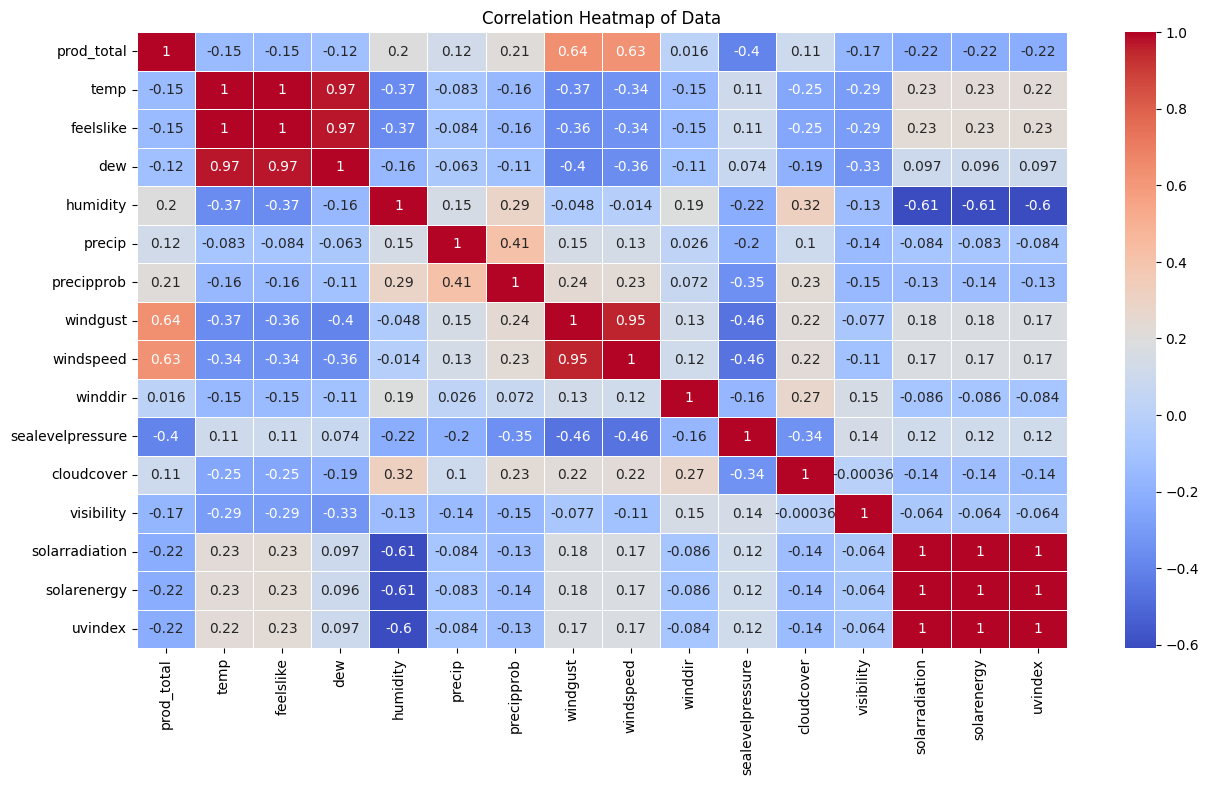

In [23]:
new_df_meteo.drop(['Group1','Group2'], axis = 1, inplace = True)
## verifier qu'il n'y a pas de correlation après regrouper les deux datasets
df= new_df_meteo.copy()
# Calculate the correlation matrix
correlation_matrix = df.drop(columns=['Date']).corr()

# Create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Data')
plt.show()

In [ ]:
new_df_meteo

,Date,Group1,Group2,prod_total,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 20:00:00,0,22,22,7.8,7.1,2.2,67.68,0.0,0,9.4,5.4,340.0,1024.6,0.0,9.4,0,0.0,0
1,2023-03-03 21:00:00,0,30,30,6.9,4.5,2.9,75.68,0.0,0,20.9,12.9,360.0,1025.0,0.0,10.0,0,0.0,0
2,2023-03-03 22:00:00,107,124,231,5.8,2.8,2.5,79.32,0.0,0,27.7,14.7,10.0,1026.1,0.0,25.8,0,0.0,0
3,2023-03-03 23:00:00,136,161,297,5.1,1.9,2.0,80.61,0.0,0,24.1,14.7,20.0,1026.2,0.0,23.7,0,0.0,0
4,2023-03-04 00:00:00,127,128,255,4.7,1.5,2.0,82.48,0.0,0,29.5,14.7,20.0,1026.3,0.0,20.4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2023-09-30 19:00:00,0,0,0,22.1,22.1,15.7,67.28,0.0,0,11.2,3.6,240.0,1024.1,0.0,34.7,21,0.1,0
4112,2023-09-30 20:00:00,0,0,0,20.1,20.1,16.1,77.75,0.0,0,11.1,5.4,281.0,1024.3,30.0,29.2,0,0.0,0
4113,2023-09-30 21:00:00,0,0,0,18.0,18.0,16.8,92.50,0.0,0,9.4,3.6,350.0,1024.3,0.0,23.8,0,0.0,0
4114,2023-09-30 22:00:00,0,0,0,16.0,16.0,16.0,99.88,0.0,0,5.5,5.4,80.0,1024.1,0.0,23.8,0,0.0,0


In [24]:
df = pd.merge(result, df_meteo, on='Date', how='inner')
df

,Date,Group1,Group2,prod_total,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 20:00:00,0,22,22,7.8,7.1,2.2,67.68,0.0,0,9.4,5.4,340.0,1024.6,0.0,9.4,0,0.0,0
1,2023-03-03 21:00:00,0,30,30,6.9,4.5,2.9,75.68,0.0,0,20.9,12.9,360.0,1025.0,0.0,10.0,0,0.0,0
2,2023-03-03 22:00:00,107,124,231,5.8,2.8,2.5,79.32,0.0,0,27.7,14.7,10.0,1026.1,0.0,25.8,0,0.0,0
3,2023-03-03 23:00:00,136,161,297,5.1,1.9,2.0,80.61,0.0,0,24.1,14.7,20.0,1026.2,0.0,23.7,0,0.0,0
4,2023-03-04 00:00:00,127,128,255,4.7,1.5,2.0,82.48,0.0,0,29.5,14.7,20.0,1026.3,0.0,20.4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2023-09-30 19:00:00,0,0,0,71.7,71.7,60.3,67.28,0.0,0,6.9,2.2,240.0,1024.1,0.0,21.6,21,0.1,0
4112,2023-09-30 20:00:00,0,0,0,68.1,68.1,60.9,77.75,0.0,0,6.9,3.3,281.0,1024.3,30.0,18.2,0,0.0,0
4113,2023-09-30 21:00:00,0,0,0,64.4,64.4,62.2,92.50,0.0,0,5.8,2.3,350.0,1024.3,0.0,14.8,0,0.0,0
4114,2023-09-30 22:00:00,0,0,0,60.8,60.8,60.8,99.88,0.0,0,3.4,3.4,80.0,1024.1,0.0,14.8,0,0.0,0


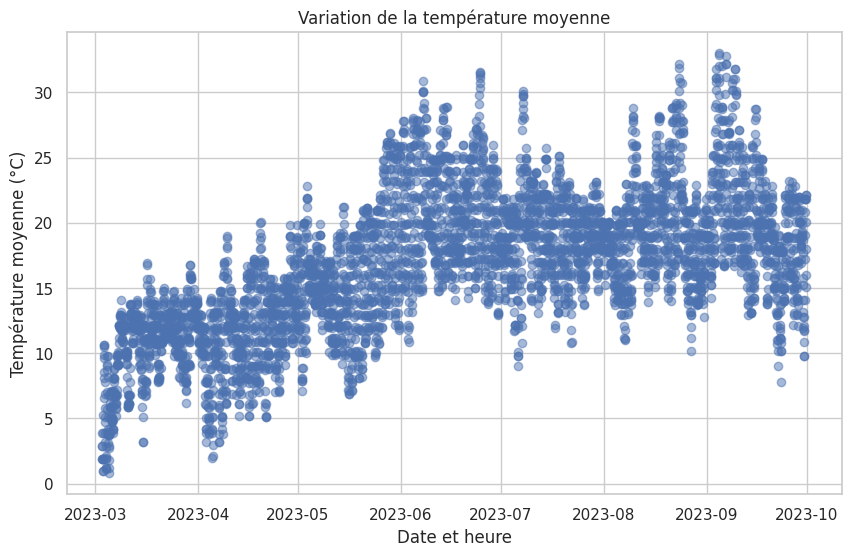

In [ ]:
import matplotlib.pyplot as plt


# Tracer un diagramme en nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(df_meteo['Date'], df_meteo['temp'], alpha=0.5)

# Ajouter des labels et un titre
plt.ylabel('Température moyenne (°C)')
plt.xlabel('Date et heure')
plt.title('Variation de la température moyenne')

# Afficher le graphique
plt.grid(True)
plt.show()


In [25]:
df_meteo.shape

(5087, 16)

In [ ]:
condition_counts = df_meteo['conditions'].value_counts()

# Création du graphique en barres pour la répartition des conditions de couverture du ciel
plt.figure(figsize=(10, 6))
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des conditions de couverture du ciel')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité
plt.tight_layout()
plt.show()

KeyError: ignored

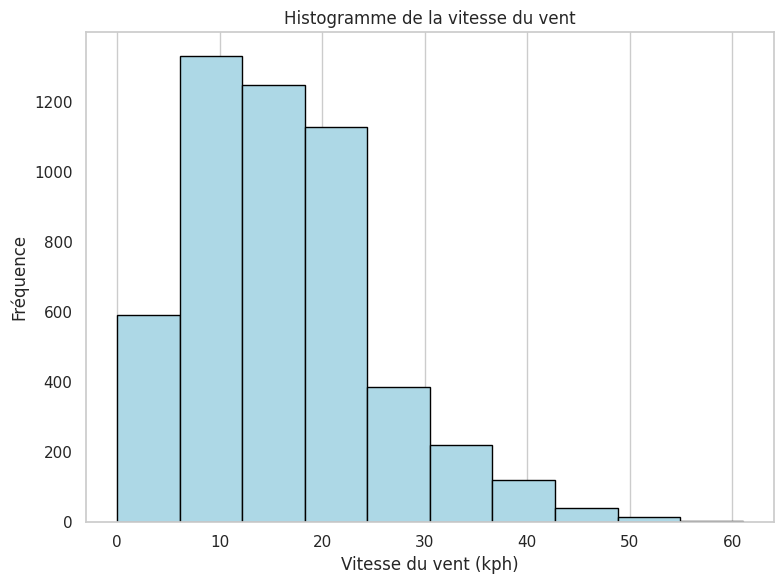

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df_meteo['windspeed'], bins=10, color='lightblue', edgecolor='black')
plt.title('Histogramme de la vitesse du vent')
plt.xlabel('Vitesse du vent (kph)')
plt.ylabel('Fréquence')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

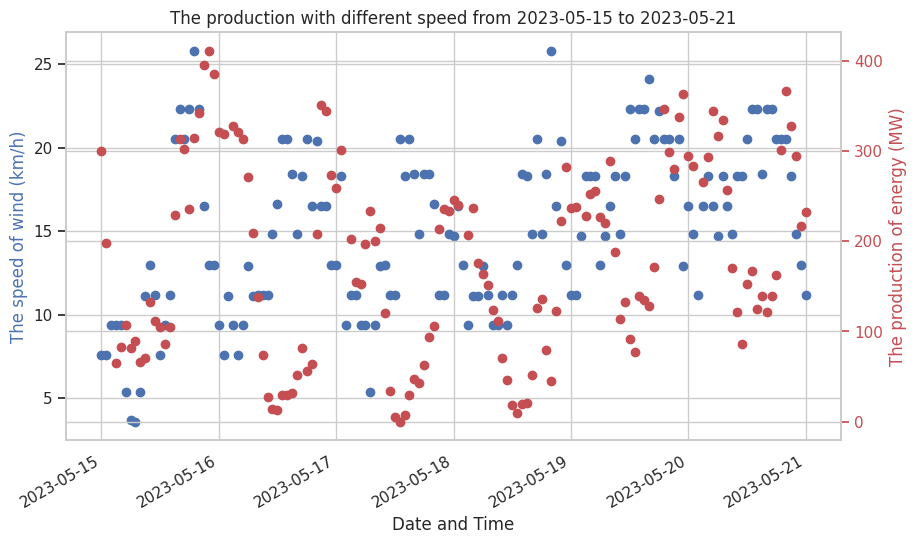

In [ ]:
## La production avec la vitesse du vent au mois de mars
# Tracer un diagramme en nuage de points
fig, ax1 = plt.subplots(figsize=(10, 6))

# Filtrer les données pour une semaine spécifique
start_date = '2023-05-15'
end_date = '2023-05-21'

may_meteo_week = df_meteo[(df_meteo['Date'] >= start_date) & (df_meteo['Date'] <= end_date)]
may_result_week = result[(result['Date'] >= start_date) & (result['Date'] <= end_date)]

# Draw the first line with the left y-axis
ax1.scatter(may_meteo_week['Date'], may_meteo_week['windspeed'], color = 'b', label = 'The speed')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('The speed of wind (km/h)', color = 'b')

# Second y-axis
ax2 = ax1.twinx()

# Draw the second line with the right y-axis
ax2.scatter(may_result_week['Date'], may_result_week['prod_total'], color = 'r', label = 'The production of eolien')
ax2.set_ylabel('The production of energy (MW)', color = 'r')
ax2.tick_params('y', colors = 'r')

# Ajouter un titre
plt.title('The production with different speed from 2023-05-15 to 2023-05-21')

# Automatic formatting of x-axis labels
plt.gcf().autofmt_xdate()

# Afficher le graphique
plt.grid(True)
plt.show()

In [ ]:
## La production avec la direction du vent
# Tracer un diagramme en nuage de points
fig, ax1 = plt.subplots(figsize=(10, 6))

# Draw the first line with the left y-axis
ax1.scatter(may_meteo_week['Date'], may_meteo_week['winddir'], color = 'b', label = 'The direction')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('The direction of wind (°)', color = 'b')

# Second y-axis
ax2 = ax1.twinx()

# Draw the second line with the right y-axis
ax2.scatter(may_result_week['Date'], may_result_week['prod_total'], color = 'r', label = 'The production of eolien')
ax2.set_ylabel('The production of energy (MW)', color = 'r')
ax2.tick_params('y', colors = 'r')

# Ajouter un titre
plt.title('The production with different direction of wind from 2023-05-15 to 2023-05-21')

# Automatic formatting of x-axis labels
plt.gcf().autofmt_xdate()

# Afficher le graphique
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Création du graphique de densité pour la vitesse du vent en fonction du temps
plt.figure(figsize=(10, 6))
plt.scatter(df_meteo['Date'], df_meteo['windspeed'], color='blue', alpha=0.7)
plt.title('Diagramme de densité de la vitesse du vent en fonction du temps')
plt.xlabel('Date et heure')
plt.ylabel('Vitesse du vent (kph)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Création du graphique de densité pour la direction du vent en fonction du temps
plt.figure(figsize=(10, 6))
plt.scatter(df_meteo['Date'], df_meteo['winddir'], color='blue', alpha=0.7)
plt.title('Diagramme de densité de la direction du vent en fonction du temps')
plt.xlabel('Date et heure')
plt.ylabel('Direction du vent (°)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_meteo

In [ ]:
df_meteo.columns

#  Data preparation for energy consumption


In [26]:
# Lire le fichier CSV en spécifiant le séparateur comme point-virgule
df_consumption_energie = pd.read_csv('consommation-quotidienne-brute-regionale.csv', sep=';')


In [27]:
df_consumption_energie.head()

,Date - Heure,Date,Heure,Code INSEE région,Région,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
0,2023-07-28T08:00:00+02:00,2023-07-28,08:00,52,Pays de la Loire,1010.0,Définitif,NaN,NaN,1010.0,1593,Consolidé,2603.0
1,2023-07-28T08:30:00+02:00,2023-07-28,08:30,75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,4480,Consolidé,NaN
2,2023-07-28T09:00:00+02:00,2023-07-28,09:00,28,Normandie,3534.0,Définitif,NaN,NaN,3534.0,2604,Consolidé,6138.0
3,2023-07-28T09:00:00+02:00,2023-07-28,09:00,32,Hauts-de-France,3624.0,Définitif,NaN,NaN,3624.0,4832,Consolidé,8456.0
4,2023-07-28T09:00:00+02:00,2023-07-28,09:00,53,Bretagne,1619.0,Définitif,NaN,NaN,1619.0,2326,Consolidé,3945.0


In [ ]:
df_consumption_energie.columns

Index(['Date - Heure', 'Date', 'Heure', 'Code INSEE région', 'Région',
       'Consommation brute gaz (MW PCS 0°C) - GRTgaz', 'Statut - GRTgaz',
       'Consommation brute gaz (MW PCS 0°C) - Teréga', 'Statut - Teréga',
       'Consommation brute gaz totale (MW PCS 0°C)',
       'Consommation brute électricité (MW) - RTE', 'Statut - RTE',
       'Consommation brute totale (MW)'],
      dtype='object')

In [ ]:
df_consumption_energie.dtypes

Date - Heure                                     object
Date                                             object
Heure                                            object
Code INSEE région                                 int64
Région                                           object
Consommation brute gaz (MW PCS 0°C) - GRTgaz    float64
Statut - GRTgaz                                  object
Consommation brute gaz (MW PCS 0°C) - Teréga    float64
Statut - Teréga                                  object
Consommation brute gaz totale (MW PCS 0°C)      float64
Consommation brute électricité (MW) - RTE         int64
Statut - RTE                                     object
Consommation brute totale (MW)                  float64
dtype: object

In [28]:
df_consumption_energie.isnull().sum()

Date - Heure                                        0
Date                                                0
Heure                                               0
Code INSEE région                                   0
Région                                              0
Consommation brute gaz (MW PCS 0°C) - GRTgaz    52416
Statut - GRTgaz                                 52416
Consommation brute gaz (MW PCS 0°C) - Teréga    91728
Statut - Teréga                                 91728
Consommation brute gaz totale (MW PCS 0°C)      52416
Consommation brute électricité (MW) - RTE           0
Statut - RTE                                        0
Consommation brute totale (MW)                  52416
dtype: int64

In [29]:
##convertir la colonne Date en type date
df_consumption_energie['Date - Heure'] = df_consumption_energie['Date - Heure'].apply(lambda x: x.split('+')[0])
df_consumption_energie['Date - Heure'] = pd.to_datetime(df_consumption_energie['Date - Heure'])
df_consumption_energie

,Date - Heure,Date,Heure,Code INSEE région,Région,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
0,2023-07-28 08:00:00,2023-07-28,08:00,52,Pays de la Loire,1010.0,Définitif,NaN,NaN,1010.0,1593,Consolidé,2603.0
1,2023-07-28 08:30:00,2023-07-28,08:30,75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,4480,Consolidé,NaN
2,2023-07-28 09:00:00,2023-07-28,09:00,28,Normandie,3534.0,Définitif,NaN,NaN,3534.0,2604,Consolidé,6138.0
3,2023-07-28 09:00:00,2023-07-28,09:00,32,Hauts-de-France,3624.0,Définitif,NaN,NaN,3624.0,4832,Consolidé,8456.0
4,2023-07-28 09:00:00,2023-07-28,09:00,53,Bretagne,1619.0,Définitif,NaN,NaN,1619.0,2326,Consolidé,3945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104827,2023-03-15 09:00:00,2023-03-15,09:00,84,Auvergne-Rhône-Alpes,7870.0,Définitif,45.0,Définitif,7915.0,8508,Consolidé,16423.0
104828,2023-03-15 09:30:00,2023-03-15,09:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,2503,Consolidé,NaN
104829,2023-03-15 09:30:00,2023-03-15,09:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,6454,Consolidé,NaN
104830,2023-03-15 09:30:00,2023-03-15,09:30,52,Pays de la Loire,NaN,NaN,NaN,NaN,NaN,3538,Consolidé,NaN


In [30]:
df_consumption_energie['Date - Heure']

0        2023-07-28 08:00:00
1        2023-07-28 08:30:00
2        2023-07-28 09:00:00
3        2023-07-28 09:00:00
4        2023-07-28 09:00:00
                 ...        
104827   2023-03-15 09:00:00
104828   2023-03-15 09:30:00
104829   2023-03-15 09:30:00
104830   2023-03-15 09:30:00
104831   2023-03-15 09:30:00
Name: Date - Heure, Length: 104832, dtype: datetime64[ns]

In [31]:
df_consumption_energie = df_consumption_energie.drop('Date', axis=1)
df_consumption_energie = df_consumption_energie.rename(columns={'Date - Heure': 'Date'})

df_consumption_energie

,Date,Heure,Code INSEE région,Région,Consommation brute gaz (MW PCS 0°C) - GRTgaz,Statut - GRTgaz,Consommation brute gaz (MW PCS 0°C) - Teréga,Statut - Teréga,Consommation brute gaz totale (MW PCS 0°C),Consommation brute électricité (MW) - RTE,Statut - RTE,Consommation brute totale (MW)
0,2023-07-28 08:00:00,08:00,52,Pays de la Loire,1010.0,Définitif,NaN,NaN,1010.0,1593,Consolidé,2603.0
1,2023-07-28 08:30:00,08:30,75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,NaN,4480,Consolidé,NaN
2,2023-07-28 09:00:00,09:00,28,Normandie,3534.0,Définitif,NaN,NaN,3534.0,2604,Consolidé,6138.0
3,2023-07-28 09:00:00,09:00,32,Hauts-de-France,3624.0,Définitif,NaN,NaN,3624.0,4832,Consolidé,8456.0
4,2023-07-28 09:00:00,09:00,53,Bretagne,1619.0,Définitif,NaN,NaN,1619.0,2326,Consolidé,3945.0
...,...,...,...,...,...,...,...,...,...,...,...,...
104827,2023-03-15 09:00:00,09:00,84,Auvergne-Rhône-Alpes,7870.0,Définitif,45.0,Définitif,7915.0,8508,Consolidé,16423.0
104828,2023-03-15 09:30:00,09:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,2503,Consolidé,NaN
104829,2023-03-15 09:30:00,09:30,32,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,6454,Consolidé,NaN
104830,2023-03-15 09:30:00,09:30,52,Pays de la Loire,NaN,NaN,NaN,NaN,NaN,3538,Consolidé,NaN


In [32]:
# Grouper par date et appliquer la somme sur les colonnes numériques
colonnes_sommables = [
                     'Consommation brute électricité (MW) - RTE',
                     'Consommation brute totale (MW)']

df_consumption = df_consumption_energie.groupby('Date')[colonnes_sommables].sum().reset_index()


In [ ]:
df_consumption

,Date,Consommation brute électricité (MW) - RTE,Consommation brute totale (MW)
0,2023-03-03,3169924,3688905.0
1,2023-03-04,2911761,3382335.0
2,2023-03-05,2778753,3246372.0
3,2023-03-06,3088219,3590811.0
4,2023-03-07,3039140,3388239.0
...,...,...,...
177,2023-08-27,1765180,1313868.0
178,2023-08-28,2012342,1595717.0
179,2023-08-29,2065277,1681377.0
180,2023-08-30,2078680,1667465.0


In [33]:


# Définir la colonne 'Date' comme index du DataFrame
df_consumption = df_consumption.set_index('Date')





In [ ]:
# Regrouper les données par heure et appliquer la somme
df_consumption = df_consumption.resample('H').sum()



TypeError: ignored

In [ ]:
# Regrouper les données par heure et appliquer la somme
df_consumption


In [34]:
df_new = pd.merge(df_consumption, df, on='Date', how='inner')

In [35]:
df_new

,Date,Consommation brute électricité (MW) - RTE,Consommation brute totale (MW),Group1,Group2,prod_total,temp,feelslike,dew,humidity,...,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 20:00:00,67337,153883.0,0,22,22,7.8,7.1,2.2,67.68,...,0,9.4,5.4,340.0,1024.6,0.0,9.4,0,0.0,0
1,2023-03-03 21:00:00,64328,147658.0,0,30,30,6.9,4.5,2.9,75.68,...,0,20.9,12.9,360.0,1025.0,0.0,10.0,0,0.0,0
2,2023-03-03 22:00:00,63679,141679.0,107,124,231,5.8,2.8,2.5,79.32,...,0,27.7,14.7,10.0,1026.1,0.0,25.8,0,0.0,0
3,2023-03-03 23:00:00,64629,138138.0,136,161,297,5.1,1.9,2.0,80.61,...,0,24.1,14.7,20.0,1026.2,0.0,23.7,0,0.0,0
4,2023-03-04 00:00:00,63369,136039.0,127,128,255,4.7,1.5,2.0,82.48,...,0,29.5,14.7,20.0,1026.3,0.0,20.4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,2023-08-31 19:00:00,47232,76559.0,156,144,300,19.9,19.9,18.0,88.87,...,100,44.5,24.0,220.0,1014.1,94.6,32.1,119,0.4,1
3720,2023-08-31 20:00:00,45412,74311.0,210,194,404,19.9,19.9,16.2,79.18,...,0,35.2,20.5,240.0,1014.1,100.0,34.8,26,0.1,0
3721,2023-08-31 21:00:00,44511,72183.0,190,208,398,19.1,19.1,17.0,87.89,...,100,33.4,20.5,220.0,1013.6,100.0,34.8,0,0.0,0
3722,2023-08-31 22:00:00,43430,69537.0,210,214,424,19.1,19.1,17.8,92.29,...,0,33.4,20.5,230.0,1014.3,100.0,12.2,0,0.0,0


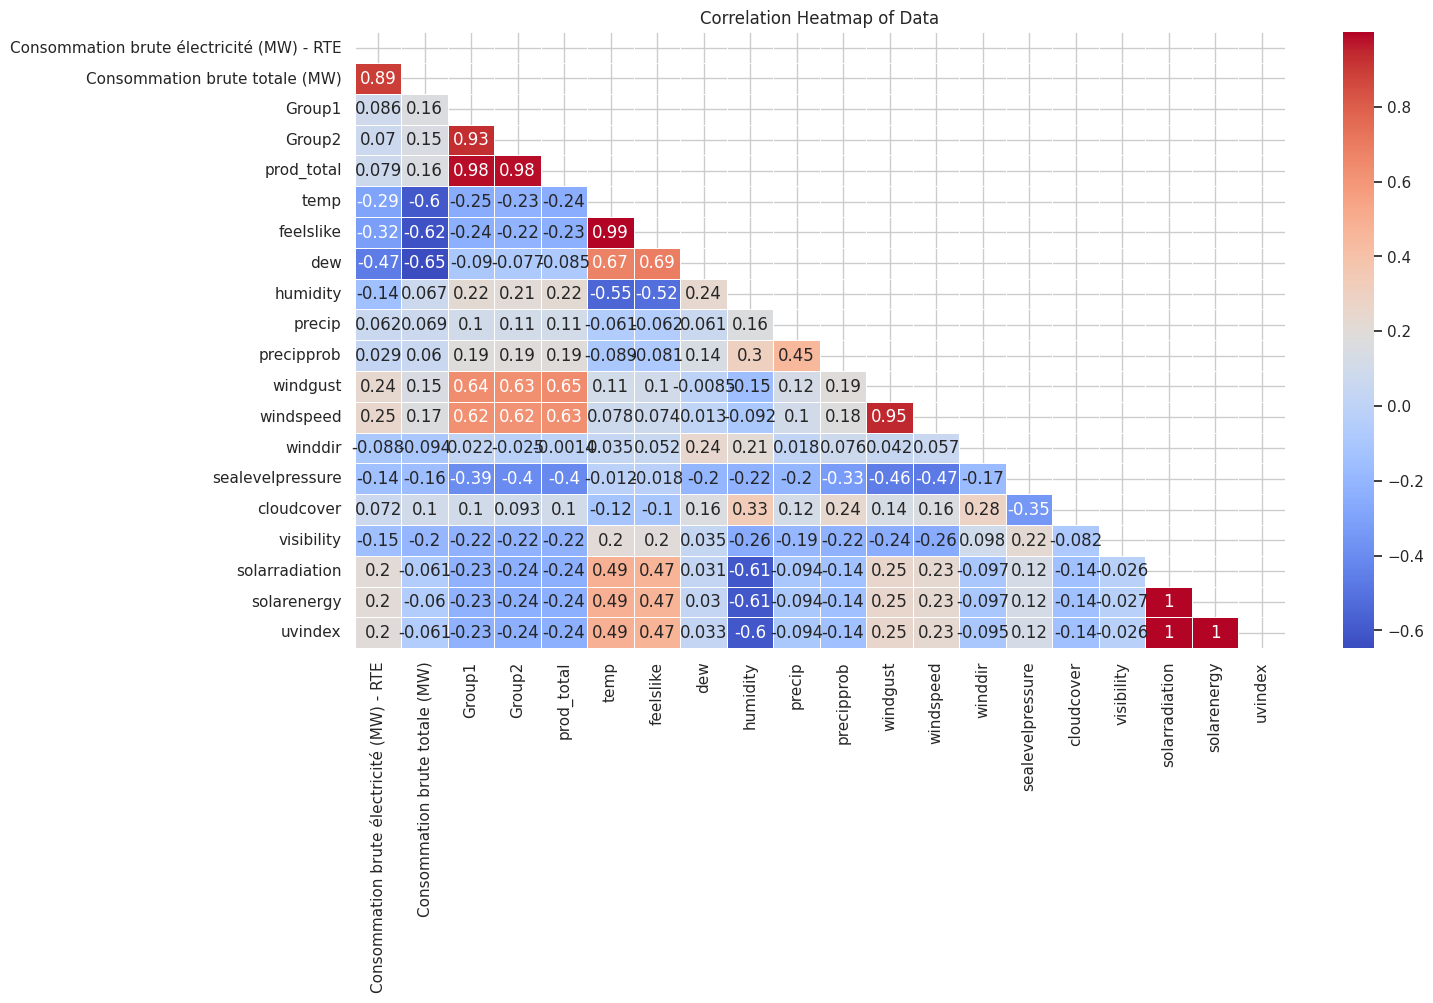

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_new.drop(columns=['Date']).corr()

# Mask upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with masked upper triangle
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap of Data')
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate both Pearson and Spearman correlations
correlation_matrix_pearson = df_new.drop(columns=['Date']).corr(method='pearson')
correlation_matrix_spearman = df_new.drop(columns=['Date']).corr(method='spearman')

# Mask upper triangle for both matrices
mask_pearson = np.triu(np.ones_like(correlation_matrix_pearson, dtype=bool))
mask_spearman = np.triu(np.ones_like(correlation_matrix_spearman, dtype=bool))

# Create subplots for both heatmaps
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot Pearson correlation heatmap
sns.heatmap(correlation_matrix_pearson, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask_pearson, ax=axes[0])
axes[0].set_title('Pearson Correlation Heatmap')

# Plot Spearman correlation heatmap
sns.heatmap(correlation_matrix_spearman, annot=False, cmap='coolwarm', linewidths=0.5, mask=mask_spearman, ax=axes[1])
axes[1].set_title('Spearman Correlation Heatmap')

plt.tight_layout()
plt.show()


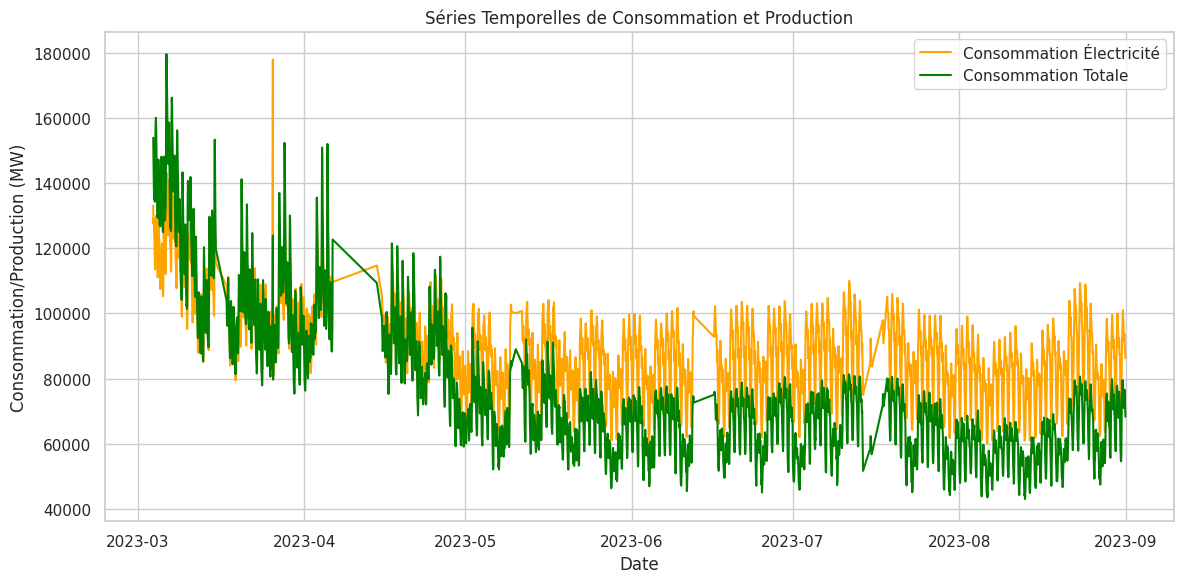

In [ ]:

df_new.set_index('Date', inplace=True)

# Tracer les séries temporelles
plt.figure(figsize=(12, 6))


# Consommation brute électricité
plt.plot(df_new.index, df_new['Consommation brute électricité (MW) - RTE'], label='Consommation Électricité', color='orange')

# Consommation brute totale
plt.plot(df_new.index, df_new['Consommation brute totale (MW)'], label='Consommation Totale', color='green')

# Production totale
# plt.plot(df_new.index, df_new['prod_total'], label='Production Totale', color='red')

# Configurations du graphique
plt.xlabel('Date')
plt.ylabel('Consommation/Production (MW)')
plt.title('Séries Temporelles de Consommation et Production')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()


In [ ]:
df_new.reset_index(inplace=True)

<ipython-input-67-0d7874499f0a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  may_meteo_week = df_meteo[(df_new['Date'] >= start_date) & (df_new['Date'] <= end_date)]


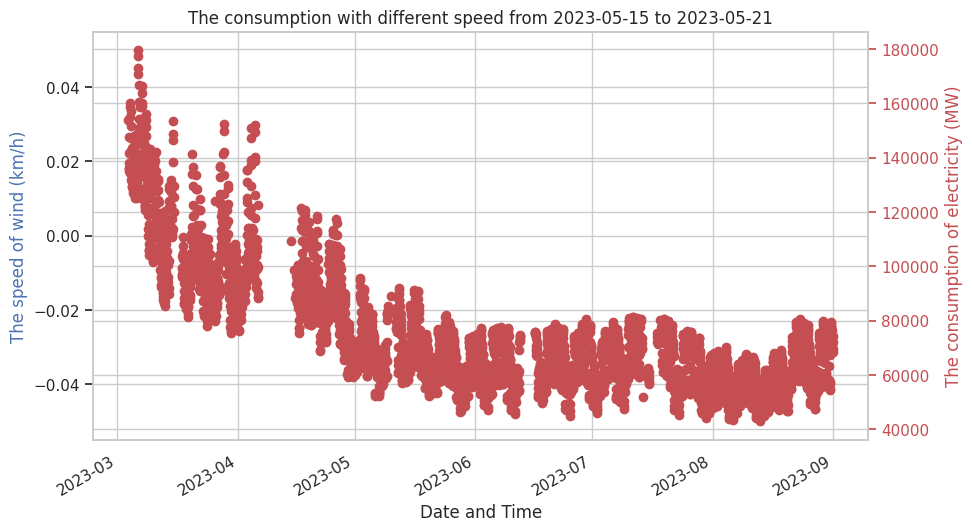

In [ ]:
## La consommation avec la vitesse du vent au mois de mars
# Tracer un diagramme en nuage de points
fig, ax1 = plt.subplots(figsize=(10, 6))

# Filtrer les données pour une semaine spécifique
start_date = '2023-05-15'
end_date = '2023-05-21'

may_meteo_week = df_meteo[(df_new['Date'] >= start_date) & (df_new['Date'] <= end_date)]
may_consommation_week = df_new[(df_new['Date'] >= start_date) & (df_new['Date'] <= end_date)]

# Draw the first line with the left y-axis
ax1.scatter(may_meteo_week['Date'], may_meteo_week['windspeed'], color = 'b', label = 'The speed')
ax1.set_xlabel('Date and Time')
ax1.set_ylabel('The speed of wind (km/h)', color = 'b')

# Second y-axis
ax2 = ax1.twinx()

# Draw the second line with the right y-axis
ax2.scatter(df_new['Date'], df_new['Consommation brute totale (MW)'], color = 'r', label = 'The consumption of electricity')
ax2.set_ylabel('The consumption of electricity (MW)', color = 'r')
ax2.tick_params('y', colors = 'r')

# Ajouter un titre
plt.title('The consumption with different speed from 2023-05-15 to 2023-05-21')

# Automatic formatting of x-axis labels
plt.gcf().autofmt_xdate()

# Afficher le graphique
plt.grid(True)
plt.show()

In [ ]:
df_new.columns


Index(['Date', 'Consommation brute électricité (MW) - RTE',
       'Consommation brute totale (MW)', 'Group1', 'Group2', 'prod_total',
       'temp', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [36]:
colonnes_a_supprimer = ['Group1', 'Group2']
df_new = df_new.drop(columns=colonnes_a_supprimer)

In [37]:
nouveaux_noms = {
    'Consommation brute électricité (MW) - RTE': 'Consommation brute electricite',
    'Consommation brute totale (MW)': 'Consommation brute totale',
    'prod_total': 'Production totale au parc'
}

df_new  = df_new .rename(columns=nouveaux_noms)

In [38]:
df_new

,Date,Consommation brute electricite,Consommation brute totale,Production totale au parc,temp,feelslike,dew,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 20:00:00,67337,153883.0,22,7.8,7.1,2.2,67.68,0.000,0,9.4,5.4,340.0,1024.6,0.0,9.4,0,0.0,0
1,2023-03-03 21:00:00,64328,147658.0,30,6.9,4.5,2.9,75.68,0.000,0,20.9,12.9,360.0,1025.0,0.0,10.0,0,0.0,0
2,2023-03-03 22:00:00,63679,141679.0,231,5.8,2.8,2.5,79.32,0.000,0,27.7,14.7,10.0,1026.1,0.0,25.8,0,0.0,0
3,2023-03-03 23:00:00,64629,138138.0,297,5.1,1.9,2.0,80.61,0.000,0,24.1,14.7,20.0,1026.2,0.0,23.7,0,0.0,0
4,2023-03-04 00:00:00,63369,136039.0,255,4.7,1.5,2.0,82.48,0.000,0,29.5,14.7,20.0,1026.3,0.0,20.4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,2023-08-31 19:00:00,47232,76559.0,300,19.9,19.9,18.0,88.87,0.001,100,44.5,24.0,220.0,1014.1,94.6,32.1,119,0.4,1
3720,2023-08-31 20:00:00,45412,74311.0,404,19.9,19.9,16.2,79.18,0.000,0,35.2,20.5,240.0,1014.1,100.0,34.8,26,0.1,0
3721,2023-08-31 21:00:00,44511,72183.0,398,19.1,19.1,17.0,87.89,0.001,100,33.4,20.5,220.0,1013.6,100.0,34.8,0,0.0,0
3722,2023-08-31 22:00:00,43430,69537.0,424,19.1,19.1,17.8,92.29,0.000,0,33.4,20.5,230.0,1014.3,100.0,12.2,0,0.0,0


In [39]:
colonnes_a_supprimer = ['Consommation brute totale', 'dew']
df_new = df_new.drop(columns=colonnes_a_supprimer)

In [40]:
df_new

,Date,Consommation brute electricite,Production totale au parc,temp,feelslike,humidity,precip,precipprob,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex
0,2023-03-03 20:00:00,67337,22,7.8,7.1,67.68,0.000,0,9.4,5.4,340.0,1024.6,0.0,9.4,0,0.0,0
1,2023-03-03 21:00:00,64328,30,6.9,4.5,75.68,0.000,0,20.9,12.9,360.0,1025.0,0.0,10.0,0,0.0,0
2,2023-03-03 22:00:00,63679,231,5.8,2.8,79.32,0.000,0,27.7,14.7,10.0,1026.1,0.0,25.8,0,0.0,0
3,2023-03-03 23:00:00,64629,297,5.1,1.9,80.61,0.000,0,24.1,14.7,20.0,1026.2,0.0,23.7,0,0.0,0
4,2023-03-04 00:00:00,63369,255,4.7,1.5,82.48,0.000,0,29.5,14.7,20.0,1026.3,0.0,20.4,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,2023-08-31 19:00:00,47232,300,19.9,19.9,88.87,0.001,100,44.5,24.0,220.0,1014.1,94.6,32.1,119,0.4,1
3720,2023-08-31 20:00:00,45412,404,19.9,19.9,79.18,0.000,0,35.2,20.5,240.0,1014.1,100.0,34.8,26,0.1,0
3721,2023-08-31 21:00:00,44511,398,19.1,19.1,87.89,0.001,100,33.4,20.5,220.0,1013.6,100.0,34.8,0,0.0,0
3722,2023-08-31 22:00:00,43430,424,19.1,19.1,92.29,0.000,0,33.4,20.5,230.0,1014.3,100.0,12.2,0,0.0,0


In [41]:
#df_new.to_excel('Données.xlsx', index=False)
df_new.to_csv('Donnees.csv', index=False)